<a href="https://colab.research.google.com/github/maindolaamit/tutorials/blob/master/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.linkedin.com/in/amit-maindola-51801423/"><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>

<h1 align="center"><font size=5 color="DE5538">Classifying Iris Species</font></h1>

A simple machine learning application.
Our goal is to build a machine learning model that can learn from the measurements
of the irises whose species is known, so that we can predict the species for a new
iris.


Import the various Libraries.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

from sklearn.datasets import load_iris
iris_dataset = load_iris()

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

In [2]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


### View the various elements in DataSet

Let's view the various fields in the Dataset.

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print('Feature Names :\n{}'.format(iris_dataset['feature_names']))

Feature Names :
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
iris_dataset['data'].shape

(150, 4)

#### Load the dataset into a DataFrame

In [7]:
# Convert the Dataset to DataFrame
iris_df = pd.DataFrame(iris_dataset['data'] ,columns = iris_dataset['feature_names'])
# Add the target value
iris_df['target'] = list(iris_dataset['target']                         )
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_df.shape

(150, 5)

In [0]:
train_df,test_df = train_test_split(iris_df,test_size = 0.3,train_size = 0.7, random_state =0)

In [10]:
print("Test Shape : {}\nTrain Shape : {}".format(test_df.shape, train_df.shape))

Test Shape : (45, 5)
Train Shape : (105, 5)


In [53]:
train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1
116,6.5,3.0,5.5,1.8,2
144,6.7,3.3,5.7,2.5,2
119,6.0,2.2,5.0,1.5,2
108,6.7,2.5,5.8,1.8,2


### Visualize the data

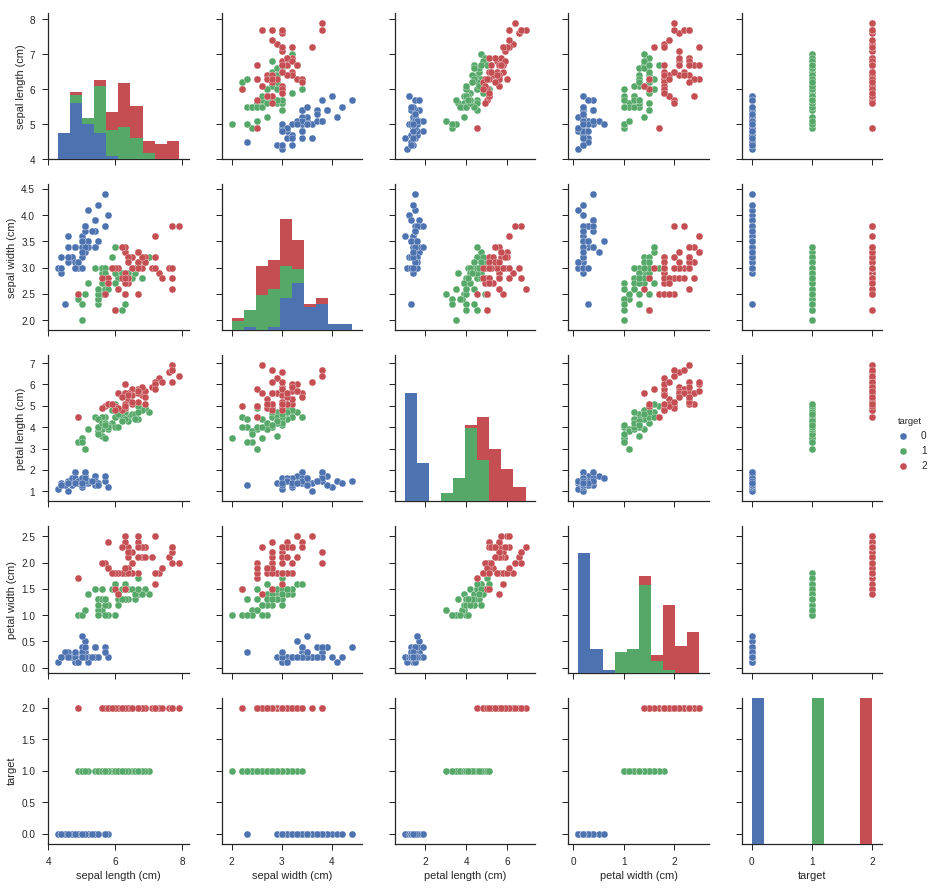

In [59]:
sns.pairplot(iris_df,hue='target')

### Create the model 

In [0]:
X_train = train_df.iloc[:, 0:4].values
X_test = test_df.iloc[:,0:4].values

y_train = train_df.iloc[:,4].values
y_test = test_df.iloc[:,4].values

In [12]:
y_train.shape

(105,)

### Create the K-Nearest Neighbour Classifier

In [13]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [0]:
y_hat = knn.predict(X_test)

In [16]:
y_hat

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [26]:
"Prediction : {} | Actual : {}".format("ll".ljust(10) ,"ksjdkskjdjsksdsdsds".ljust(10))

'Prediction : ll         | Actual : ksjdkskjdjsksdsdsds'

### Evaluate the performance of the Model

In [42]:
print("{} {} {}".format("Seq".ljust(5),"Prediction".ljust(15),"Actual"))
for i in y_hat[:5]:
  print("{} {} {}".format(str(i).ljust(5), iris_dataset['target_names'][y_hat[i]].ljust(15), iris_dataset['target_names'][y_test[i]]))

Seq   Prediction      Actual
2     setosa          setosa
1     versicolor      versicolor
0     virginica       virginica
2     setosa          setosa
0     virginica       virginica


View the Accuraccy matrix

In [49]:
print("Accuraccy of Test set : {0:0.2f}".format(np.mean(y_hat == y_test)))

Accuraccy of Test set : 0.98


In [52]:
print("KNN Accuraccy of Test set : {0:0.2f}".format(knn.score(X_test,y_test)))

KNN Accuraccy of Test set : 0.98
